In [1]:
import numpy as np
import csv
import glob
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from os import listdir
        
# content = content.decode('utf-8')         



# test_data = np.genfromtxt('./data_export_cobercat/data_export_1-2015.csv',skip_header=1,delimiter=',', dtype=None, names=['timestamp','date','lat','lng','signal_inst','signal_min','signal_max','signal_avg','carrier','fullCarrier','status','net','net_type','lac','cid','psc','speed,satellites','precision1','provider','activity','incident','downloadSpeed','uploadSpeed'],filling_values=(-1))

In [47]:
class cell_user:
    '''Holds data for each user'''
    
    def __init__(self, inpu):
        self.timestamp = int(inpu[0])
        self.date = inpu[1]
#         self.datetime = datetime.strptime(self.date, '%Y-%m-%d %H:%M:%S.%f')
#         self.datetime = datetime(self.timestamp)
        try:
            self.datetime = datetime.fromtimestamp(self.timestamp/1000.0)
        except:
            pass

        self.lat = float(inpu[2])
        self.lng = float(inpu[3])
        self.signal_inst = int(inpu[4])
        self.signal_min = int(inpu[5])
        self.signal_max = int(inpu[6])
        self.signal_avg = int(inpu[7])
        self.carrier = unicode(inpu[8])
        self.fullCarrier = unicode(inpu[9])
        self.status = int(inpu[10])
            
#         self.status = int(inpu[10])
        self.net = int(inpu[11])
        self.net_type = inpu[12]
        self.lac = int(inpu[13])
        self.cid = int(inpu[14])
        self.psc = int(inpu[15])
        self.speed = float(inpu[16])
        self.satellites = int(inpu[17])
        self.precision1 = int(inpu[18])
        self.provider = inpu[19]
        self.activity = int(inpu[20])
        try:
            self.incident = inpu[21]
            if len(self.incident) == 0:
                self.incident = -1
            
        except:
            self.incident = -1
            
        try:
            self.downloadSpeed = inpu[22]
            self.uploadSpeed = inpu[23]
            
        except:
            self.downloadSpeed = -1
            self.uploadSpeed = -1
        
        
        
    def __str__(self):
        '''return the name upon str(object)'''
        return str(self.timestamp)


In [23]:
def average_attr(list_of_phones, attr):
    """averages that attribute in the list"""
    total = 0
    n = 0
    for x in list_of_phones:
        try:
            total += float(getattr(x, attr))
            n += 1
        
        except:
            pass
    
    average = total/float(n)

    return average
    

In [65]:
def keys_and_incidences(list_of_phones, attr):
    """finds each key and the number of incidences"""
    key_incid = {}
    for x in list_of_phones:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            key_incid[label] += 1
        
        except:
            key_incid[label] = 1
    


    return key_incid

In [25]:
def just_values(list_of_phones, attr):
    """finds each key and the number of incidences"""
    values = []
    for x in list_of_phones:
        strEval = 'x.'+attr
        value = eval(strEval)
        values.append(value)
    


    return values

In [26]:
def plot_bars(list_of_phones, attr):
    """Plots each key with the number of incidences"""
    
    k_c = keys_and_incidences(list_of_phones, attr)
    plt.bar(range(len(k_c)), k_c.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

In [62]:
def plot_hist(list_of_phones, attr):
    """Plots a histogram for that attribute"""
    
#     k_c = keys_and_incidences(list_of_phones, attr)
    values = just_values(list_of_phones,attr)
    
    n, bins, patches = plt.hist(values, 5, normed=1, facecolor='green', alpha=0.75)
    
#     plt.bar(range(len(k_c)), k_c.values(), align='center')
#     plt.xticks(rotation=90)
#     plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    xlab = "Value of "+attr
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.show()

In [84]:
def import_all_data(folder):
    """Imports all the data from the folder"""
    searchTerm = folder + "*.csv"
    files = glob.glob(searchTerm)
    
    list_of_phone_data = []
    error_entries = []
    
    for fil in files:
        phone_data = open(unix, "r")
        phone_data_reader = csv.reader(phone_data, delimiter=',')
        phone_data_list = list(phone_data_reader)
        print fil
        print len(list_of_phone_data)

        for x in phone_data_list[1:]:
            try:
                y = cell_user(x)
                list_of_phone_data.append (y)
                if len(list_of_phone_data)%100000 == 0:
                    print y.date
                    print y.datetime
            except:
                error_entries.append(str(x))
                
    print "Total valid entries: " , len(list_of_phone_data)
    print "Ratio of invalid entries:" , len(error_entries)/float(len(list_of_phone_data))
    
    return list_of_phone_data,error_entries

In [70]:
unix = "./data_export_cobercat/data_export_1-2015.csv"

phone_data = open(unix, "r")
phone_data_reader = csv.reader(phone_data, delimiter=',')
phone_data_list = list(phone_data_reader)
list_of_phone_data = []
error_entries = []

for x in phone_data_list[1:]:
    try:
        y = cell_user(x)
        list_of_phone_data.append (y)
    except:
        error_entries.append(str(x))
        
        
print list_of_phone_data[-1]
print len(error_entries)/float(len(list_of_phone_data))

1448865682652
0.00389511303859


In [ ]:
for x in list_of_phone_data[-10:-5]:
    print x.uploadSpeed

In [ ]:
sum = 0
count = 0
for x in list_of_phone_data:
    sum += float(getattr(x, "speed"))
    count += 1

In [ ]:
print sum/count

In [ ]:
len(list_of_phone_data)

In [ ]:
print average_attr(list_of_phone_data, "precision1")

In [ ]:
k_c= keys_and_incidences(list_of_phone_data,'fullCarrier')

In [ ]:
# plt.plot(k_c)

plt.bar(range(len(k_c)), k_c.values(), align='center')
plt.xticks(rotation=90)
plt.xticks(range(len(k_c)), k_c.keys())



In [ ]:
print (k_c.values)



In [ ]:
plot_bars(list_of_phone_data,'carrier')
plot_bars(list_of_phone_data,'fullCarrier')


In [ ]:
plot_bars(list_of_phone_data,'net_type')


In [85]:
all_data = import_all_data("./data_export_cobercat/")[0]

./data_export_cobercat/data_export_01-2015.csv
0
./data_export_cobercat/data_export_01-2016.csv
99612
2015-12-05 22:50:15.950000
2015-12-05 21:50:15.950000
./data_export_cobercat/data_export_02-2015.csv
199224
2015-12-05 21:40:00.000000
2015-12-05 20:40:00
./data_export_cobercat/data_export_02-2016.csv
298836
2015-12-05 20:57:18.032000
2015-12-05 19:57:18.032000
./data_export_cobercat/data_export_03-2015.csv
398448
2015-12-05 20:18:59.000000
2015-12-05 19:18:59
./data_export_cobercat/data_export_03-2016.csv
498060
2015-12-05 19:50:32.000000
2015-12-05 18:50:32
./data_export_cobercat/data_export_04-2015.csv
597672
2015-12-05 19:23:50.000000
2015-12-05 18:23:50
./data_export_cobercat/data_export_04-2016.csv
697284
2015-12-05 19:02:46.000000
2015-12-05 18:02:46
./data_export_cobercat/data_export_05-2015.csv
796896
2015-12-05 18:41:29.573000
2015-12-05 17:41:29.573000
./data_export_cobercat/data_export_05-2016.csv
896508
2015-12-05 18:22:39.000000
2015-12-05 17:22:39
./data_export_cobercat

In [ ]:
plot_bars(all_data,'fullCarrier')


In [ ]:
print len(all_data)

In [ ]:
average_attr(all_data, "speed")

In [ ]:
plot_bars(all_data, "activity")

In [ ]:
plot_bars(all_data,'net_type')

In [ ]:
plot_bars(list_of_phone_data,'net_type')

In [ ]:
# Next is to filter by data/maybe 
# n, bins, patches = plt.hist(all_data, 50, normed=1, facecolor='green', alpha=0.75)

In [ ]:
plot_hist(list_of_phone_data,'speed')

In [ ]:
print all_data[1].date

In [ ]:
date_datetime = datetime.strptime(all_data[1].date, '%Y-%m-%d %H:%M:%S.%f')
print date_datetime

In [ ]:
print average_attr(all_data,datetime)

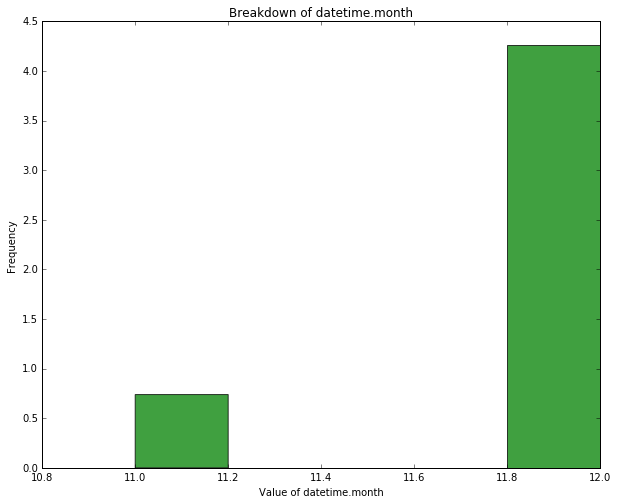

In [63]:
plot_hist(all_data,'datetime.month')

In [78]:
print all_data[-15000].date

2015-12-01 06:19:12.000000


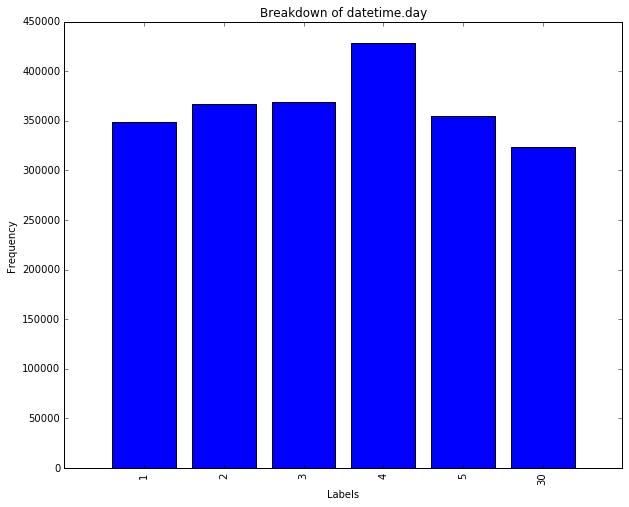

In [67]:
plot_bars(all_data,'datetime.day')